In [53]:
!pip install pandas scikit-learn numpy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [54]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
dataset = pd.read_csv('large_data.csv')

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred = knn.predict(X_test)

In [60]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[343  20  10]
 [ 43 424   0]
 [104  45 243]]

Classification Report:
              precision    recall  f1-score   support

       COVID       0.70      0.92      0.79       373
   INFLUENZA       0.87      0.91      0.89       467
 VIRUS FEVER       0.96      0.62      0.75       392

    accuracy                           0.82      1232
   macro avg       0.84      0.82      0.81      1232
weighted avg       0.85      0.82      0.82      1232



In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.8198051948051948


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [65]:
symptoms_encoder = OneHotEncoder(handle_unknown='ignore')
symptoms_encoder.fit(X_train)
X_train_encoded = symptoms_encoder.transform(X_train)
X_test_encoded = symptoms_encoder.transform(X_test)

In [66]:
import numpy as np

In [67]:
cv_scores = cross_val_score(knn, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.71834416 0.72646104 0.66883117 0.72321429 0.64581641]
Mean cross-validation score: 0.6965334117547763


In [68]:
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt

In [70]:
cm = confusion_matrix(y_test, y_pred)

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(len(np.unique(y_test))):
        for j in range(len(np.unique(y_test))):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

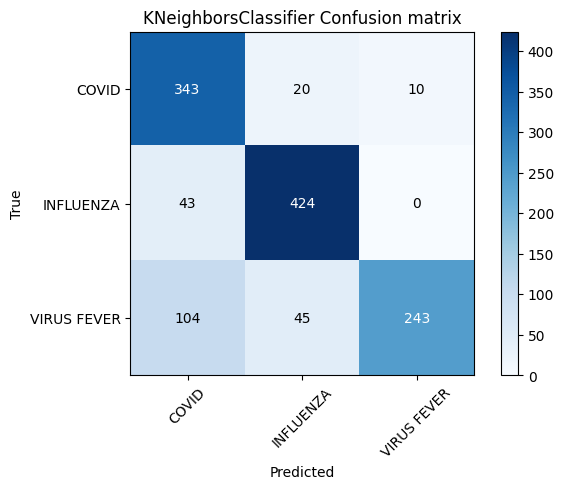

In [73]:
plot_confusion_matrix(knn, X_test, y_test, 'KNeighborsClassifier')